In [200]:

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler, OrdinalEncoder, OneHotEncoder, RobustScaler
from pycaret.regression import *
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [201]:
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

## Voir ici pour plus d'info : https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

In [202]:
## Ou alors : 
# import joblib
# # save model
# joblib.dump(my_model, 'lgb.pkl')
# # load model
# gbm_pickle = joblib.load('lgb.pkl')

In [203]:
# # Pour prédir avec le model pycaret best 
# unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
# unseen_predictions.head()

In [204]:
df = pd.read_csv('../data/train.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)
df['day'] = pd.to_datetime(df['datetime']).dt.dayofyear
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df.drop('datetime', axis=1, inplace=True)


df2 = df.drop(columns=['registered', 'casual'], index=1)


In [205]:
data =  pd.read_csv('../old/train.csv')

In [206]:
data["date"] = data['datetime'].apply(lambda x : x.split()[0])
data["hour"] = data['datetime'].apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data['datetime'].apply(lambda x : x.split()[0].split("-")[0])
data["month"] = data['date'].apply(lambda string : string.split('-')[1])
data["day"] = data['date'].apply(lambda  string: string.split('-')[2])

season=pd.get_dummies(data['season'],prefix='season')
data=pd.concat([data,season],axis=1)
weather=pd.get_dummies(data['weather'],prefix='weather')
data=pd.concat([data,weather],axis=1)
data.drop(['season','weather'],inplace=True,axis=1)
data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,month,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,01,01,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,01,01,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,01,01,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,01,01,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,01,01,1,0,0,0,1,0,0,0


In [207]:
del data['casual']
del data['registered']
data

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,date,hour,...,month,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,16,2011-01-01,0,...,01,01,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,40,2011-01-01,1,...,01,01,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,32,2011-01-01,2,...,01,01,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,13,2011-01-01,3,...,01,01,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,1,2011-01-01,4,...,01,01,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,336,2012-12-19,19,...,12,19,0,0,0,1,1,0,0,0
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,241,2012-12-19,20,...,12,19,0,0,0,1,1,0,0,0
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,168,2012-12-19,21,...,12,19,0,0,0,1,1,0,0,0
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.0032,129,2012-12-19,22,...,12,19,0,0,0,1,1,0,0,0


In [208]:
del data['datetime']
del data['date']

In [209]:
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)

In [210]:
data

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,year,month,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0000,16,0,2011,1,1,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0000,40,1,2011,1,1,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0000,32,2,2011,1,1,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0000,13,3,2011,1,1,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0000,1,4,2011,1,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,336,19,2012,12,19,0,0,0,1,1,0,0,0
10882,0,1,14.76,17.425,57,15.0013,241,20,2012,12,19,0,0,0,1,1,0,0,0
10883,0,1,13.94,15.910,61,15.0013,168,21,2012,12,19,0,0,0,1,1,0,0,0
10884,0,1,13.94,17.425,61,6.0032,129,22,2012,12,19,0,0,0,1,1,0,0,0


In [211]:
data.dtypes

holiday         int64
workingday      int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
hour            int32
year            int32
month           int32
day             int32
season_1        uint8
season_2        uint8
season_3        uint8
season_4        uint8
weather_1       uint8
weather_2       uint8
weather_3       uint8
weather_4       uint8
dtype: object

In [212]:
data['temp'] = data['temp'].apply(lambda x : np.log1p(x))

data['atemp'] = data['atemp'].apply(lambda x : np.log1p(x))

data['humidity'] = data['humidity'].apply(lambda x : np.log1p(x))

data['windspeed'] = data['windspeed'].apply(lambda x : np.log1p(x))

data['hour'] = data['hour'].apply(lambda x : np.log1p(x))

for index, row in data.iterrows():
    if(row['year'] == 2012 and row['month'] == 9 and row['day'] == 1):
        break

data['month'] = data['month'].apply(lambda x : np.log1p(x))

data['day'] = data['day'].apply(lambda x : np.log1p(x))
year=pd.get_dummies(data['year'],prefix='year')
data=pd.concat([data,year],axis=1)
del data['year']
del data['day']

test = data[index:]
train = data[:index]
train['count'] = train['count'].apply(lambda x : np.log1p(x))




In [213]:
train

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,month,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012
0,0,0,2.383243,2.734043,4.406719,0.000000,2.833213,0.000000,0.693147,1,0,0,0,1,0,0,0,1,0
1,0,0,2.304583,2.683416,4.394449,0.000000,3.713572,0.693147,0.693147,1,0,0,0,1,0,0,0,1,0
2,0,0,2.304583,2.683416,4.394449,0.000000,3.496508,1.098612,0.693147,1,0,0,0,1,0,0,0,1,0
3,0,0,2.383243,2.734043,4.330733,0.000000,2.639057,1.386294,0.693147,1,0,0,0,1,0,0,0,1,0
4,0,0,2.383243,2.734043,4.330733,0.000000,0.693147,1.609438,0.693147,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,0,0,3.304686,3.443778,4.304065,2.302395,5.834811,2.995732,2.197225,0,0,1,0,0,1,0,0,0,1
9059,0,0,3.304686,3.443778,4.304065,2.638914,5.616771,3.044522,2.197225,0,0,1,0,0,1,0,0,0,1
9060,0,0,3.274121,3.419201,4.369448,1.946367,5.252273,3.091042,2.197225,0,0,1,0,0,0,1,0,0,1
9061,0,0,3.274121,3.419201,4.369448,2.485023,4.043051,3.135494,2.197225,0,0,1,0,0,1,0,0,0,1


In [214]:
test


,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,month,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012
9063,0,0,3.444895,3.557916,4.143135,2.079629,168,0.000000,2.302585,0,0,1,0,1,0,0,0,0,1
9064,0,0,3.418382,3.579344,4.317488,2.302395,79,0.693147,2.302585,0,0,1,0,1,0,0,0,0,1
9065,0,0,3.391147,3.513782,4.262680,2.485023,69,1.098612,2.302585,0,0,1,0,1,0,0,0,0,1
9066,0,0,3.391147,3.513782,4.262680,2.079629,35,1.386294,2.302585,0,0,1,0,1,0,0,0,0,1
9067,0,0,3.391147,3.513782,4.262680,0.000000,12,1.609438,2.302585,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,2.808197,3.029892,3.931826,3.295937,336,2.995732,2.564949,0,0,0,1,1,0,0,0,0,1
10882,0,1,2.757475,2.913708,4.060443,2.772670,241,3.044522,2.564949,0,0,0,1,1,0,0,0,0,1
10883,0,1,2.704042,2.827905,4.127134,2.772670,168,3.091042,2.564949,0,0,0,1,1,0,0,0,0,1
10884,0,1,2.704042,2.913708,4.127134,1.946367,129,3.135494,2.564949,0,0,0,1,1,0,0,0,0,1


In [215]:
exp_reg101 = setup(data = data, target = 'count', session_id=123, train_size=0.8) 

,Description,Value
0,session_id,123
1,Target,count
2,Original Data,"(10886, 19)"
3,Missing Values,0
4,Numeric Features,16
5,Categorical Features,2
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(8708, 17)"


In [216]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,27.2619,1800.5964,42.3242,0.9453,0.4078,0.4129,0.1300
xgboost,Extreme Gradient Boosting,27.6460,1838.9180,42.7584,0.9441,0.4341,0.3980,0.3630
rf,Random Forest Regressor,27.9918,1952.7408,44.0717,0.9408,0.3554,0.3304,0.6230
et,Extra Trees Regressor,28.3422,1975.0375,44.3014,0.9401,0.3535,0.3265,0.5360
dt,Decision Tree Regressor,37.3156,3778.3985,61.3661,0.8850,0.4525,0.3978,0.0250
gbr,Gradient Boosting Regressor,46.1431,4537.5512,67.3182,0.8622,0.6776,0.9387,0.2160
knn,K Neighbors Regressor,67.1253,10509.4884,102.4043,0.6815,0.7037,1.1315,0.0350
ada,AdaBoost Regressor,84.0668,10784.3300,103.7912,0.6723,1.0153,2.4500,0.1520
lar,Least Angle Regression,106.7892,19579.6345,139.8680,0.4061,1.2412,3.8459,0.0090
br,Bayesian Ridge,106.7717,19578.1261,139.8625,0.4061,1.2410,3.8443,0.0080


In [217]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,28.0313,2197.3372,46.8758,0.9341,0.3738,0.3809
1,29.5188,2257.9176,47.5176,0.9352,0.3430,0.3014
2,30.2273,2233.6611,47.2616,0.9367,0.3765,0.3673
3,29.8153,2356.1748,48.5404,0.9290,0.3599,0.3333
4,27.8598,1959.1896,44.2627,0.9326,0.3686,0.3487
5,26.6000,1673.1488,40.9041,0.9494,0.3364,0.2905
6,26.1894,1607.8537,40.0981,0.9508,0.3400,0.3000
7,27.8149,1937.8659,44.0212,0.9415,0.3481,0.3113
8,26.8582,1528.0642,39.0905,0.9538,0.3324,0.3010
9,27.0030,1776.1950,42.1449,0.9445,0.3750,0.3699


In [218]:
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [219]:
best

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

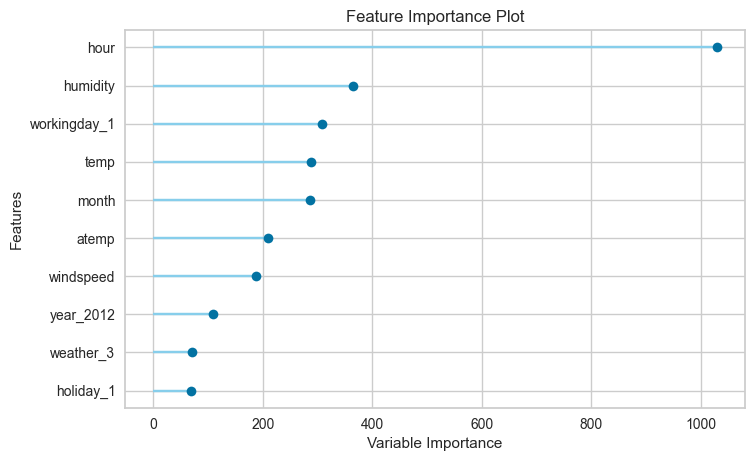

In [220]:
plot_model(best, plot='feature')

In [221]:
# To save the model with pickle file 
# save_model(best,'lightgbm-location-velo')
# Tuned_rf = tune_model(rf) 
# Tuned_rf

holiday


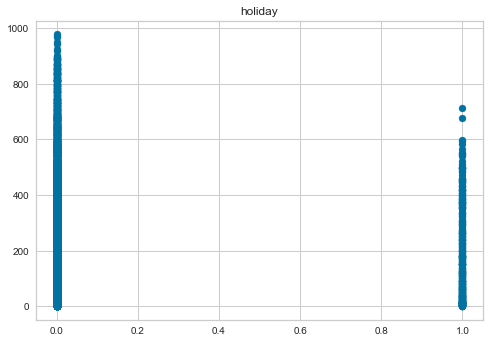

workingday


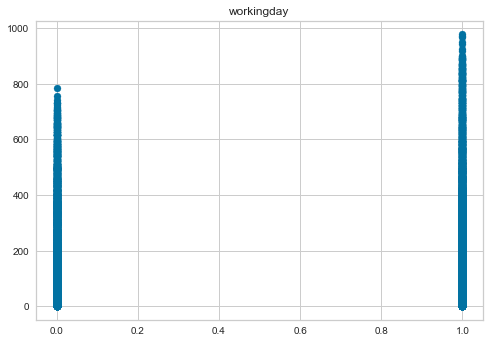

temp


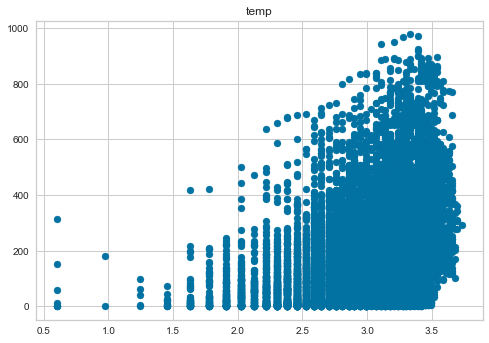

atemp


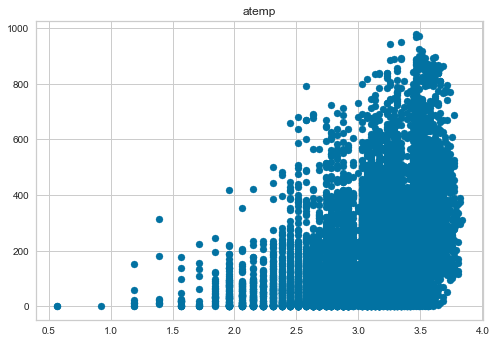

humidity


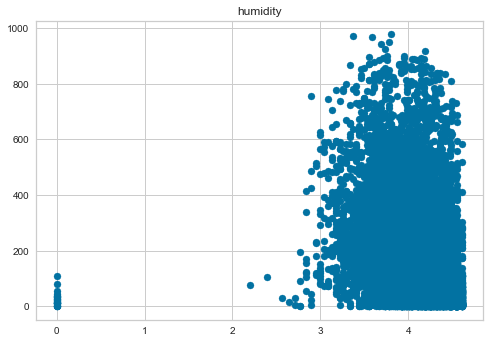

windspeed


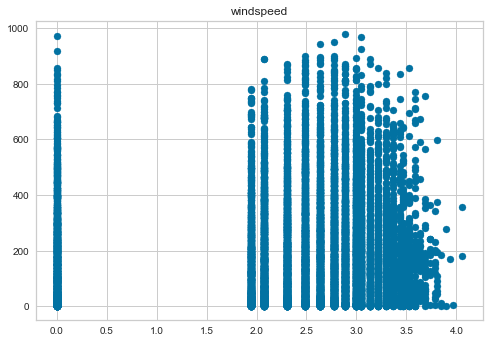

count


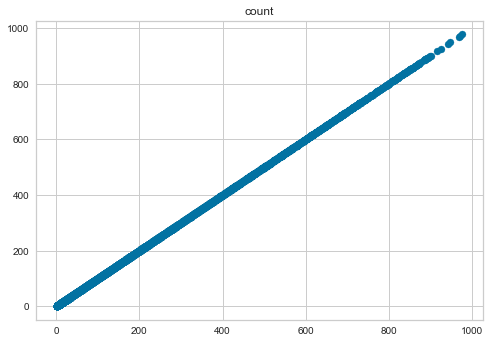

hour


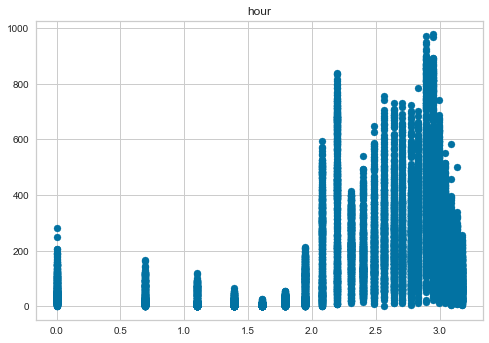

month


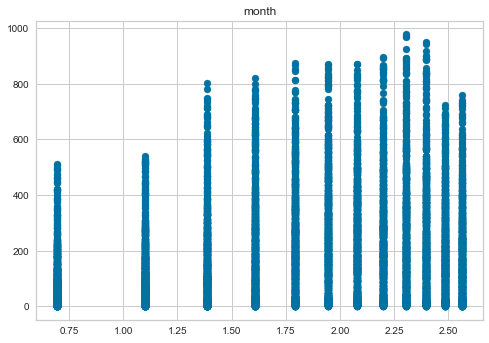

season_1


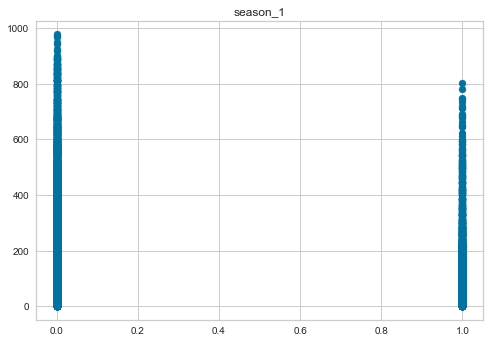

season_2


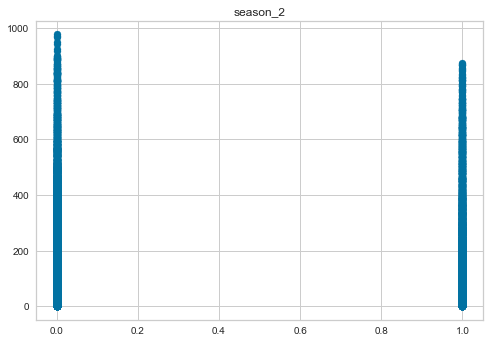

season_3


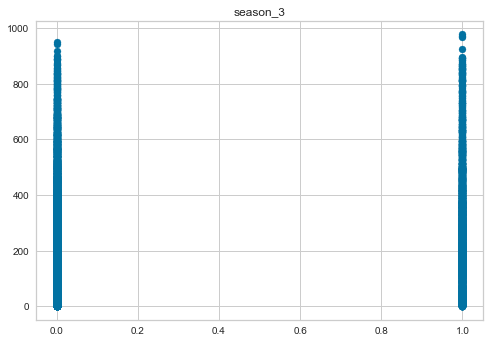

season_4


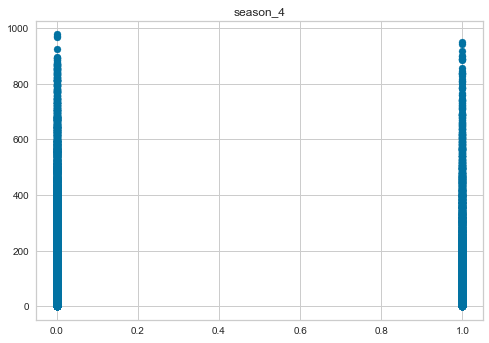

weather_1


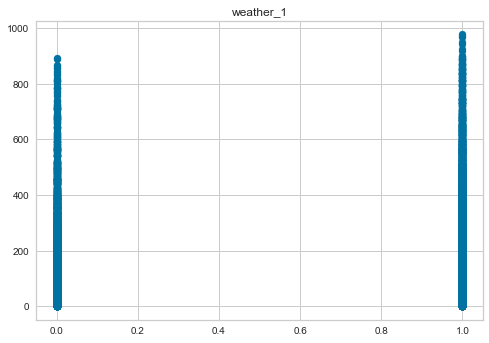

weather_2


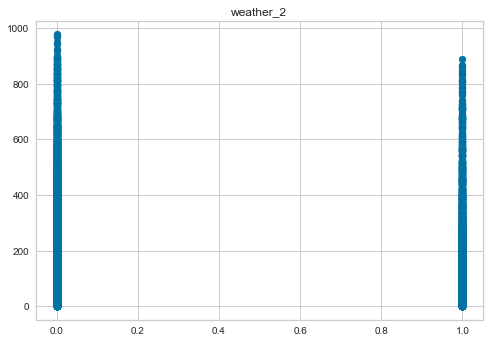

weather_3


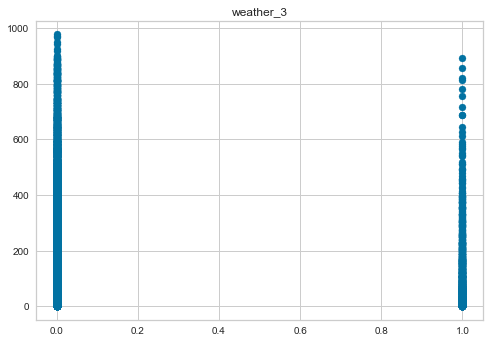

weather_4


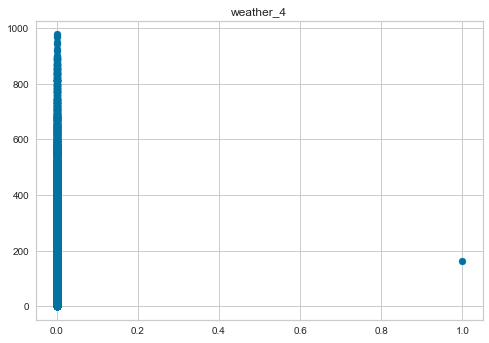

year_2011


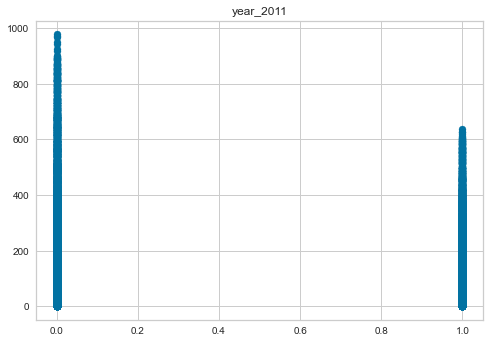

year_2012


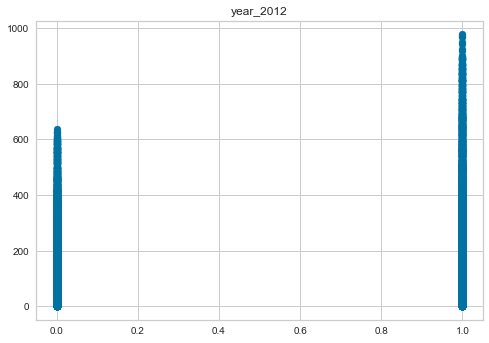

In [222]:
for i in data.columns:
    plt.title(i)
    print(i)
    plt.scatter(y = data['count'], x = data[i])
    plt.show()

In [223]:
test

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,month,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012
9063,0,0,3.444895,3.557916,4.143135,2.079629,168,0.000000,2.302585,0,0,1,0,1,0,0,0,0,1
9064,0,0,3.418382,3.579344,4.317488,2.302395,79,0.693147,2.302585,0,0,1,0,1,0,0,0,0,1
9065,0,0,3.391147,3.513782,4.262680,2.485023,69,1.098612,2.302585,0,0,1,0,1,0,0,0,0,1
9066,0,0,3.391147,3.513782,4.262680,2.079629,35,1.386294,2.302585,0,0,1,0,1,0,0,0,0,1
9067,0,0,3.391147,3.513782,4.262680,0.000000,12,1.609438,2.302585,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,2.808197,3.029892,3.931826,3.295937,336,2.995732,2.564949,0,0,0,1,1,0,0,0,0,1
10882,0,1,2.757475,2.913708,4.060443,2.772670,241,3.044522,2.564949,0,0,0,1,1,0,0,0,0,1
10883,0,1,2.704042,2.827905,4.127134,2.772670,168,3.091042,2.564949,0,0,0,1,1,0,0,0,0,1
10884,0,1,2.704042,2.913708,4.127134,1.946367,129,3.135494,2.564949,0,0,0,1,1,0,0,0,0,1


In [224]:
model = Lasso()


In [225]:
x_train = train.copy()
del x_train['count']
y_train = train['count']

x_test = test.copy()
del x_test['count']
y_test = test['count']

In [226]:
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
score


-1.3568265568982993

In [227]:
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [228]:
train

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,month,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012
0,0,0,2.383243,2.734043,4.406719,0.000000,2.833213,0.000000,0.693147,1,0,0,0,1,0,0,0,1,0
1,0,0,2.304583,2.683416,4.394449,0.000000,3.713572,0.693147,0.693147,1,0,0,0,1,0,0,0,1,0
2,0,0,2.304583,2.683416,4.394449,0.000000,3.496508,1.098612,0.693147,1,0,0,0,1,0,0,0,1,0
3,0,0,2.383243,2.734043,4.330733,0.000000,2.639057,1.386294,0.693147,1,0,0,0,1,0,0,0,1,0
4,0,0,2.383243,2.734043,4.330733,0.000000,0.693147,1.609438,0.693147,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,0,0,3.304686,3.443778,4.304065,2.302395,5.834811,2.995732,2.197225,0,0,1,0,0,1,0,0,0,1
9059,0,0,3.304686,3.443778,4.304065,2.638914,5.616771,3.044522,2.197225,0,0,1,0,0,1,0,0,0,1
9060,0,0,3.274121,3.419201,4.369448,1.946367,5.252273,3.091042,2.197225,0,0,1,0,0,0,1,0,0,1
9061,0,0,3.274121,3.419201,4.369448,2.485023,4.043051,3.135494,2.197225,0,0,1,0,0,1,0,0,0,1


In [229]:
num = ['temp', 'atemp', 'humidity', 'windspeed','hour','month']
poly = make_pipeline(PolynomialFeatures(degree=3))
transformer = make_column_transformer((poly, num))
model = make_pipeline(transformer, RandomForestRegressor())

In [230]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = np.exp(model.predict(x_test))
r2_score(y_test, y_pred)

0.8201190001062044

In [231]:
from sklearn.ensemble import GradientBoostingRegressor


In [232]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred = np.exp(model.predict(x_test))
r2_score(y_test, y_pred)

0.6994562988257369

In [233]:
from sklearn.ensemble import ExtraTreesRegressor


In [234]:
model = ExtraTreesRegressor()
model.fit(x_train, y_train)
y_pred = np.exp(model.predict(x_test))
print(r2_score(y_test, y_pred))
print(mean_squared_log_error(y_test, y_pred))

0.8581060068141397
0.12984913839156817


In [235]:
from sklearn.model_selection import learning_curve

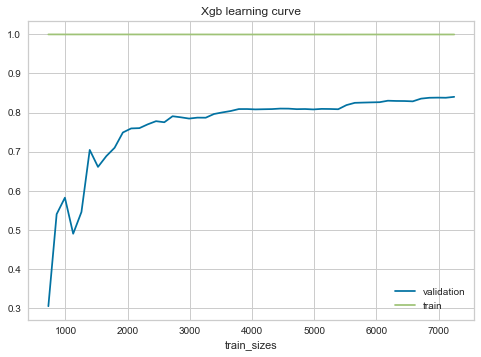

In [236]:
import matplotlib.pyplot as plt

N, train_score, val_score = learning_curve(ExtraTreesRegressor(), x_train, y_train, train_sizes = np.linspace(0.1,1,50), cv=5, scoring='r2')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.plot(N, train_score.mean(axis=1), label='train')

plt.xlabel('train_sizes')
plt.title('Xgb learning curve')
plt.legend()
plt.show() 

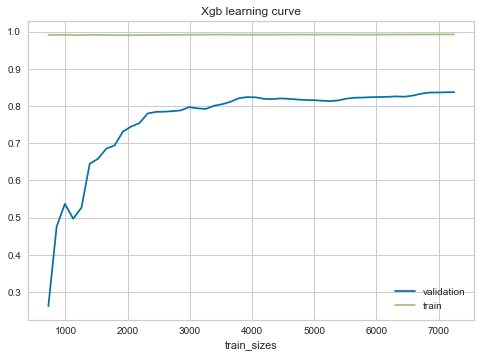

In [237]:
import matplotlib.pyplot as plt

N, train_score, val_score = learning_curve(RandomForestRegressor(), x_train, y_train, train_sizes = np.linspace(0.1,1,50), cv=5, scoring='r2')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.plot(N, train_score.mean(axis=1), label='train')

plt.xlabel('train_sizes')
plt.title('Xgb learning curve')
plt.legend()
plt.show() 

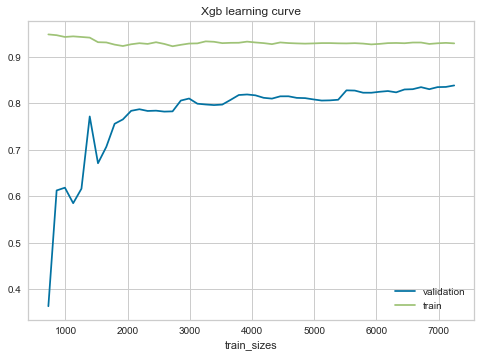

In [238]:
import matplotlib.pyplot as plt

N, train_score, val_score = learning_curve(GradientBoostingRegressor(), x_train, y_train, train_sizes = np.linspace(0.1,1,50), cv=5, scoring='r2')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.plot(N, train_score.mean(axis=1), label='train')

plt.xlabel('train_sizes')
plt.title('Xgb learning curve')
plt.legend()
plt.show() 

In [239]:
import xgboost

In [240]:
pip = make_pipeline(StandardScaler())
pip1 = make_pipeline(OrdinalEncoder())
transformer = make_column_transformer((pip1, ['hour', 'day', 'month']))
model = make_pipeline(xgboost.XGBRegressor())
model.fit(x_train, y_train)
y_pred = np.exp(model.predict(x_test))
print(r2_score(y_test, y_pred))

0.8587842033439493


In [241]:
model = xgboost.XGBRegressor()
model.fit(x_train, y_train)
y_pred = np.exp(model.predict(x_test))
print(r2_score(y_test, y_pred))

0.8587842033439493


In [242]:
x_train[x_train['holiday'] == 1]

,holiday,workingday,temp,atemp,humidity,windspeed,hour,month,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012
372,1,0,2.219203,2.384165,3.871201,2.772670,0.000000,0.693147,1,0,0,0,0,1,0,0,1,0
373,1,0,2.219203,2.384165,3.806662,2.638914,0.693147,0.693147,1,0,0,0,0,1,0,0,1,0
374,1,0,2.125848,2.233771,3.784190,2.890255,1.098612,0.693147,1,0,0,0,0,1,0,0,1,0
375,1,0,2.125848,2.311545,3.784190,2.638914,1.386294,0.693147,1,0,0,0,0,1,0,0,1,0
376,1,0,2.125848,2.384165,3.784190,2.302395,1.609438,0.693147,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8242,1,0,3.590715,3.717224,3.871201,2.772670,2.995732,2.079442,0,0,1,0,1,0,0,0,0,1
8243,1,0,3.590715,3.717224,3.871201,2.772670,3.044522,2.079442,0,0,1,0,1,0,0,0,0,1
8244,1,0,3.567841,3.717224,3.988984,2.302395,3.091042,2.079442,0,0,1,0,1,0,0,0,0,1
8245,1,0,3.544432,3.698706,4.043051,2.772670,3.135494,2.079442,0,0,1,0,1,0,0,0,0,1


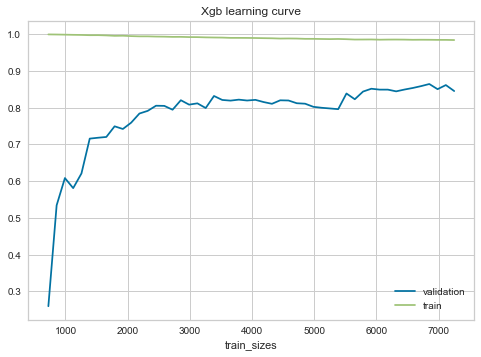

In [243]:
import matplotlib.pyplot as plt

N, train_score, val_score = learning_curve(xgboost.XGBRegressor(), x_train, y_train, train_sizes = np.linspace(0.1,1,50), cv=5, scoring='r2')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.plot(N, train_score.mean(axis=1), label='train')

plt.xlabel('train_sizes')
plt.title('Xgb learning curve')
plt.legend()
plt.show() 

In [244]:
import lightgbm as lgb

model = lgb.LGBMRegressor()
model.fit(x_train, y_train)
y_pred = np.exp(model.predict(x_test))
print(r2_score(y_test, y_pred))


0.8406018574707892


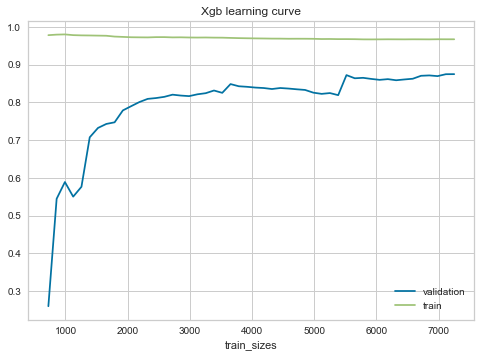

In [245]:
import matplotlib.pyplot as plt

N, train_score, val_score = learning_curve(lgb.LGBMRegressor(), x_train, y_train, train_sizes = np.linspace(0.1,1,50), cv=5, scoring='r2')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.plot(N, train_score.mean(axis=1), label='train')

plt.xlabel('train_sizes')
plt.title('Xgb learning curve')
plt.legend()
plt.show() 